# Process Data

## Imports and Setup

In [20]:

# Import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import json


In [2]:

# Load data
with open('../data/chainmail_data.json', mode='r') as json_file:
    data = json.load(json_file)


In [3]:

# Convert data into a pandas DataFrame and show sample values
df = pd.DataFrame(data).transpose()
df.head()


,Articles,Date Uploaded,Ideal AR,Last Edited,Max AR,Min AR,Tags,Weave Title
1,{'Weave Tutorials': ['Trizantine (CGI)']},"May 3, 2008, 6:36 pm",5.2,"June 22, 2017, 11:45 am",,,"[European, Chain, Progression, Alpha]",Trizantine
2,{'Weave Tutorials': ['Hizashi Subfamily']},"December 28, 2008, 7:41 pm",8.0|3.0,"August 2, 2011, 7:13 pm",,,"[Japanese, Sheet, Radial, Modification]",Hizashi 1
3,{'Weave Tutorials': ['Hizashi Subfamily']},"December 28, 2008, 7:42 pm",6.0|3.5,"August 2, 2011, 7:13 pm",,,"[Japanese, Sheet, Radial, Modification]",Hizashi 3
4,None,"November 8, 2002, 2:37 am",7.3|3.0,"August 2, 2011, 7:37 pm",,,"[Japanese, Sheet, Progression, Alpha]",Japanese 5 in 1 (3.3.4.3.4)
5,None,"April 15, 2004, 5:29 am",5.5|3.3,"August 2, 2011, 7:18 pm",,,"[Japanese, Sheet, Orbital, Modification]",Interlock


## Clean Up Data

### Remove Invalid Values

In [4]:

# Remove null-articles
null_records = df['Weave Title'].isnull()
df = df[~null_records]

# Replace an unexpected bad value with an empty string
df.replace(to_replace={"AR'sShownareinMultipleWireSizes,seeWeaveDescriptionfordetails.": ''}, inplace=True)


### Clean Up Dates

In [5]:

# Convert date columns to datetime format
df['Date Uploaded'] = pd.to_datetime(df['Date Uploaded'], format="mixed")
df['Last Edited'] = pd.to_datetime(df['Last Edited'], format='mixed', dayfirst=True)


### Construct Article Values

In [6]:
# Determine how many article types exist

types = set()

for i in df['Articles'].values:
    if i:
        types.update(i.keys())

types



{'Other Related Articles', 'Weave Tutorials'}

In [7]:

# Write helper function that counts the number of articles
def count_articles(d: dict) -> int:
    if not d:
        return 0
    
    out = 0
    for key, value in d.items():
        out += len(value)
    return out


# Write helper function that counts the number of tutorials
def count_tutorials(d: dict) -> int:
    if not d:
        return 0
    
    return len(d.get('Weave Tutorials', list()))


# Create a column that contains the number of articles the record has
df['Num Articles'] = df['Articles'].apply(count_articles)

# Create a column that contains the number tutorials the record has
df['Num Tutorials'] = df['Articles'].apply(count_tutorials)

# This does the same thing but is more complex
# df['Articles'].apply(lambda d : len(d.get('Weave Tutorials', list())) if d else 0)


### Handle AR Values

In [8]:

# Create a column denoting if the record has an AR value
ideal_empty = (df['Ideal AR'] == '')
min_empty = (df['Min AR'] == '')
max_empty = (df['Max AR'] == '')

df['Has AR Value'] = (~(ideal_empty & min_empty & max_empty))


# Create a column denoting if the record has multiple AR values
multi_ideal = df['Ideal AR'].str.contains('\|')
multi_min = df['Min AR'].str.contains('\|')
multi_max = df['Max AR'].str.contains('\|')

df['Has Multiple AR Values'] = (multi_ideal | multi_min | multi_max)


## Answer Questions And Create Graphs

### What Are The Most Common Aspect Ratios

In [9]:

### No Restrictions

### Single AR only

### Has tutorials only

### Single AR with tutorials only


### What Are The Most Popular Tags

In [10]:

### 10 most popular weaves

### See if it may be possible to do this as a time series


### How Many Weaves Came Out Over Time

Looking at the graphs below it shows that aside from a dip in weave submissions in 2007 M.A.I.L. was receiving it highest yearly submissions from 2006 to 2010. Looking at the monthly data there is one large outlier in November 2006 where 95 weaves were submitted that month.

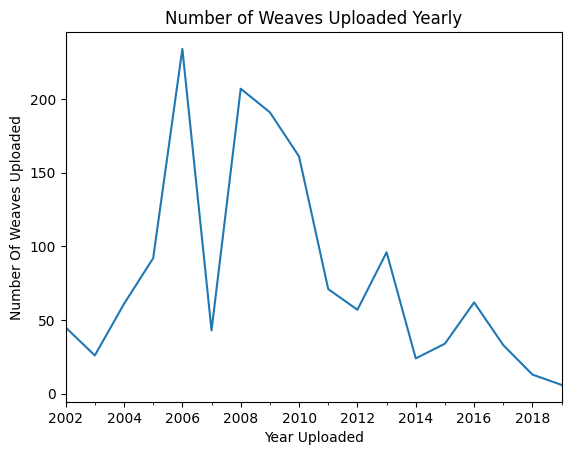

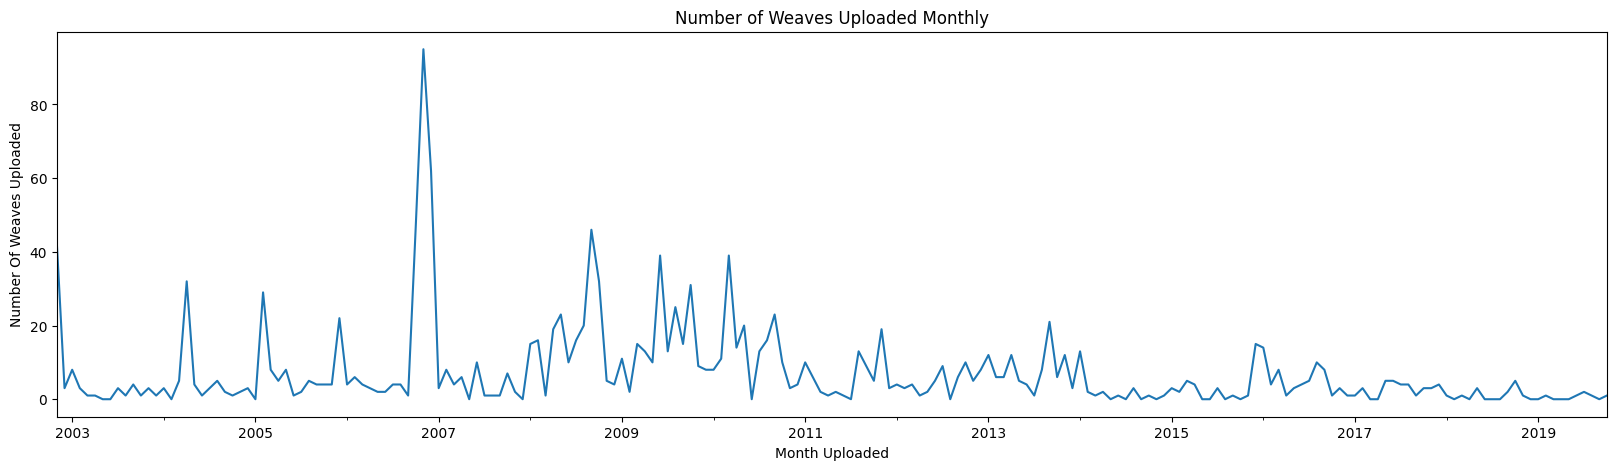

In [81]:

yearly_data = df[['Weave Title', 'Date Uploaded']].groupby(pd.Grouper(key='Date Uploaded', freq='Y')).agg('count').reset_index()
_ = yearly_data.plot(
    kind='line', 
    x='Date Uploaded', 
    y='Weave Title', 
    xlabel='Year Uploaded', 
    ylabel='Number Of Weaves Uploaded', 
    title='Number of Weaves Uploaded Yearly', 
    legend=False
)


monthly_data = df[['Weave Title', 'Date Uploaded']].groupby(pd.Grouper(key='Date Uploaded', freq='M')).agg('count').reset_index()
_ = monthly_data.plot(
    kind='line', 
    x='Date Uploaded', 
    y='Weave Title', 
    xlabel='Month Uploaded', 
    ylabel='Number Of Weaves Uploaded', 
    title='Number of Weaves Uploaded Monthly', 
    legend=False,
    figsize=(20,5)
)
